<a href="https://colab.research.google.com/github/MuhammadBayuNugroho/analisis-sentimen-indobert-dan-deberta-tanpa-random-oversampling/blob/main/Baru_of_06_FIKS_NON_Random_Oversampling_Analisis_Sentimen_IndoBERT_dan_DeBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMA INDOBERT DAN DEBERTA TANPA RANDOM OVERSAMPLING**

# Import Library yang dibutuhkan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers==4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.31.0 which is incompatible.


In [ ]:
!pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# Import library pandas untuk manipulasi dan analisis data
import pandas as pd
# Import library numpy untuk operasi numerik
import numpy as np

# Import library train_test_split untuk membagi dataset menjadi data train dan test
from sklearn.model_selection import train_test_split
# Import library compute_class_weight untuk menghitung bobot kelas dalam dataset yang tidak seimbang
from sklearn.utils.class_weight import compute_class_weight
# Import library SMOTE untuk melakukan oversampling pada dataset yang tidak seimbang
from imblearn.over_sampling import SMOTE
# Import library Counter untuk menghitung distribusi kelas
from collections import Counter

# Import library matplotlib.pyplot untuk membuat visualisasi data
import matplotlib.pyplot as plt

# Import library torch untuk operasi tensor dan deep learning
import torch
# Import library DataLoader dan Dataset untuk mempersiapkan pipeline data dalam PyTorch
from torch.utils.data import DataLoader, Dataset

# Import library BertTokenizer dan BertForSequenceClassification untuk menggunakan model IndoBERT
from transformers import BertTokenizer, BertForSequenceClassification
# Import library DebertaV2Tokenizer dan DebertaV2ForSequenceClassification untuk menggunakan model DeBERTa
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification
# Import library AdamW untuk optimasi model deep learning
from transformers.optimization import AdamW

# Import library classification_report dan confusion_matrix untuk evaluasi performa model
from sklearn.metrics import classification_report, confusion_matrix
# Nilai akurasi, presisi, recall, dan f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import time

# Load Dataset

In [ ]:
# Memuat dataset dari google drive
file_path = '/content/drive/MyDrive/Dataset Analisis Sentimen/Baru - Hasil EDA Preprocessing 3.csv'
dataset = pd.read_csv(file_path)

# Menampilkan informasi umum dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cleaned Comment    1711 non-null   object
 1   Revised_Sentiment  1711 non-null   object
dtypes: object(2)
memory usage: 26.9+ KB


In [ ]:
# ubah nama kolom
dataset = dataset.rename(columns={'Revised_Sentiment': 'Sentiment'})

dataset.head()

,Cleaned Comment,Sentiment
0,baterai mahal,negative
1,subsidi mobil listrik orang kaya guys kalau ba...,neutral
2,hemat listrik mobil pakai panel sorya solusinya,neutral
3,mahal ciptain mesin listrik,negative
4,regulasi safetynya gak bahas parkir garasi rum...,positive


## Distribusi Sentimen

Distribusi Sentimen:
Sentiment
positive    1013
negative     488
neutral      210
Name: count, dtype: int64


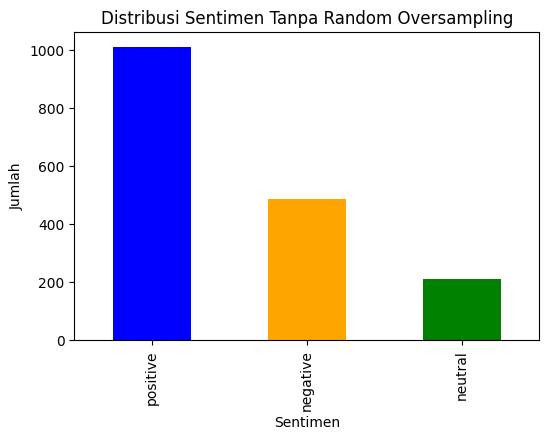

In [ ]:
# Distribusi Sentimen
def plot_sentiment_distribution(y):
    counts = y.value_counts()
    counts.plot(kind='bar', color=['blue', 'orange', 'green'], figsize=(6, 4))
    plt.title("Distribusi Sentimen Tanpa Random Oversampling")
    plt.xlabel("Sentimen")
    plt.ylabel("Jumlah")
    plt.show()

print("Distribusi Sentimen:")
print(dataset['Sentiment'].value_counts())
plot_sentiment_distribution(dataset['Sentiment'])

## Frekuensi Kata

In [ ]:
# 2. Frekuensi Kata
positive_texts = dataset[dataset['Sentiment'] == 'positive']['Cleaned Comment']
negative_texts = dataset[dataset['Sentiment'] == 'negative']['Cleaned Comment']
neutral_texts = dataset[dataset['Sentiment'] == 'neutral']['Cleaned Comment']

positive_words = Counter(" ".join(positive_texts).split())
negative_words = Counter(" ".join(negative_texts).split())
neutral_words = Counter(" ".join(neutral_texts).split())

print("\nKata Paling Sering pada Sentimen Positif:")
print(positive_words.most_common(10))

print("\nKata Paling Sering pada Sentimen Negatif:")
print(negative_words.most_common(10))

print("\nKata Paling Sering pada Sentimen Netral:")
print(neutral_words.most_common(10))


Kata Paling Sering pada Sentimen Positif:
[('mobil', 945), ('listrik', 735), ('harga', 414), ('ev', 408), ('beli', 318), ('murah', 309), ('kendara', 189), ('baterai', 174), ('jual', 174), ('indonesia', 170)]

Kata Paling Sering pada Sentimen Negatif:
[('mobil', 322), ('mahal', 302), ('listrik', 266), ('harga', 200), ('beli', 121), ('baterai', 101), ('ev', 93), ('motor', 58), ('gak', 57), ('orang', 54)]

Kata Paling Sering pada Sentimen Netral:
[('mobil', 116), ('mending', 114), ('beli', 88), ('listrik', 73), ('moga', 59), ('ev', 53), ('harga', 46), ('subsidi', 40), ('kalo', 34), ('kendara', 30)]


# Split data dan Tokenizer

In [ ]:
# ===================== SPLIT DATA =====================
# Encode labels
label_mapping = {"negative": 0, "neutral": 1, "positive": 2}
dataset['label'] = dataset['Sentiment'].map(label_mapping)

# Split dataset
X = dataset['Cleaned Comment']
y = dataset['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# ===================== TOKENIZER DAN DATASET =====================
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }


# IndoBERT

In [ ]:
# ===================== IMPLEMENTASI INDOBERT =====================
indobert_tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
train_texts = X_train.tolist()
train_labels = y_train.tolist()

train_dataset = SentimentDataset(train_texts, train_labels, indobert_tokenizer, max_len=512)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

indobert_model = BertForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p2",
    num_labels=3
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
indobert_model = indobert_model.to(device)

optimizer = AdamW(indobert_model.parameters(), lr=3e-6)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Inisialisasi penyimpanan metrik
epoch_list = list(range(1, 6))
loss_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [ ]:
# Training IndoBERT
start_time = time.time()
indobert_model.train()

for epoch in range(5):
    total_loss = 0
    all_preds = []
    all_labels = []

    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = indobert_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.detach().cpu().numpy())
        all_labels.extend(labels.detach().cpu().numpy())

    # Hitung metrik
    avg_loss = total_loss / len(train_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

    # Simpan hasil ke list
    loss_list.append(avg_loss)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Waktu
    indobert_training_time = time.time() - start_time

    # Logging ke terminal
    print(f"Epoch {epoch+1}")
    print(f"  Loss      : {avg_loss:.4f}")
    print(f"  Accuracy  : {accuracy:.4f}")
    print(f"  Precision : {precision:.4f}")
    print(f"  Recall    : {recall:.4f}")
    print(f"  F1 Score  : {f1:.4f}")
    print(f"  Time Elapsed: {indobert_training_time:.2f} seconds\n")

Epoch 1
  Loss      : 0.9289
  Accuracy  : 0.5753
  Precision : 0.4657
  Recall    : 0.3632
  F1 Score  : 0.3313
  Time Elapsed: 121.07 seconds

Epoch 2
  Loss      : 0.7619
  Accuracy  : 0.6667
  Precision : 0.7454
  Recall    : 0.4482
  F1 Score  : 0.4485
  Time Elapsed: 241.85 seconds

Epoch 3
  Loss      : 0.4704
  Accuracy  : 0.8275
  Precision : 0.8248
  Recall    : 0.7488
  F1 Score  : 0.7791
  Time Elapsed: 362.65 seconds

Epoch 4
  Loss      : 0.3031
  Accuracy  : 0.9006
  Precision : 0.8771
  Recall    : 0.8526
  F1 Score  : 0.8635
  Time Elapsed: 483.13 seconds

Epoch 5
  Loss      : 0.2121
  Accuracy  : 0.9386
  Precision : 0.9225
  Recall    : 0.8973
  F1 Score  : 0.9087
  Time Elapsed: 603.71 seconds



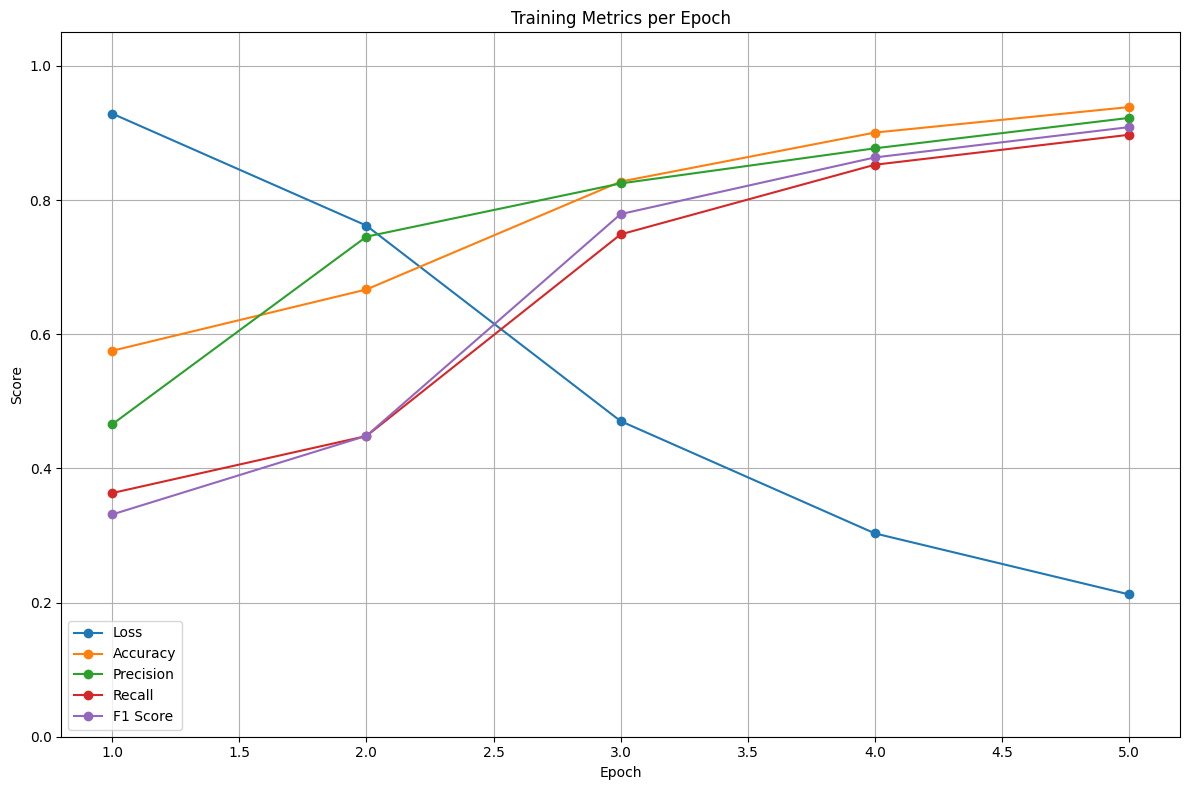

In [ ]:
# Visualisasi hasil training
plt.figure(figsize=(12, 8))
plt.plot(epoch_list, loss_list, label='Loss', marker='o')
plt.plot(epoch_list, accuracy_list, label='Accuracy', marker='o')
plt.plot(epoch_list, precision_list, label='Precision', marker='o')
plt.plot(epoch_list, recall_list, label='Recall', marker='o')
plt.plot(epoch_list, f1_list, label='F1 Score', marker='o')

plt.title('Training Metrics per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("training_metrics.png")  # Simpan grafik sebagai file PNG
plt.show()


Laporan Klasifikasi IndoBERT:
              precision    recall  f1-score   support

    negative       0.96      0.96      0.96       390
     neutral       0.91      0.83      0.87       168
    positive       0.97      0.99      0.98       810

    accuracy                           0.96      1368
   macro avg       0.95      0.93      0.94      1368
weighted avg       0.96      0.96      0.96      1368



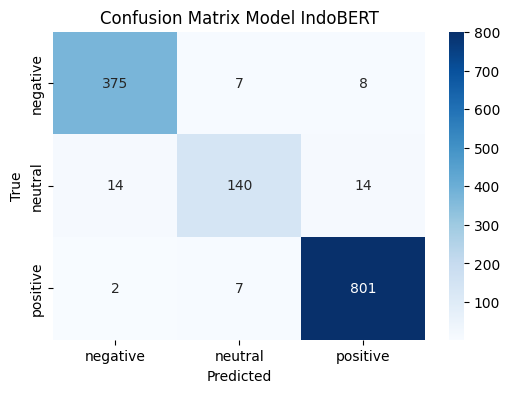

In [ ]:
# Evaluasi IndoBERT
import seaborn as sns

indobert_model.eval()
y_true_indobert, y_pred_indobert = [], []
with torch.no_grad():
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = indobert_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        y_true_indobert.extend(labels.cpu().numpy())
        y_pred_indobert.extend(predictions.cpu().numpy())

print("\nLaporan Klasifikasi IndoBERT:")
print(classification_report(y_true_indobert, y_pred_indobert, target_names=label_mapping.keys()))

# Visualisasikan Hasilnya
cm = confusion_matrix(y_true_indobert, y_pred_indobert)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model IndoBERT')
plt.show()

In [ ]:
indobert_accuracy = accuracy_score(y_true_indobert, y_pred_indobert)
indobert_precision, indobert_recall, indobert_f1, _ = precision_recall_fscore_support(y_true_indobert, y_pred_indobert, average='weighted')

print(f"IndoBERT Accuracy: {indobert_accuracy:.4f}")
print(f"IndoBERT Precision: {indobert_precision:.4f}")
print(f"IndoBERT Recall: {indobert_recall:.4f}")
print(f"IndoBERT F1-Score: {indobert_f1:.4f}")

IndoBERT Accuracy: 0.9620
IndoBERT Precision: 0.9613
IndoBERT Recall: 0.9620
IndoBERT F1-Score: 0.9614


# DeBERTa

In [ ]:
# ===================== IMPLEMENTASI DEBERTA =====================
deberta_tokenizer = DebertaV2Tokenizer.from_pretrained("microsoft/deberta-v3-small")
train_texts = X_train.tolist()
train_labels = y_train.tolist()

train_dataset_deberta = SentimentDataset(train_texts, train_labels, deberta_tokenizer, max_len=512)
train_loader_deberta = DataLoader(train_dataset_deberta, batch_size=16, shuffle=True)

deberta_model = DebertaV2ForSequenceClassification.from_pretrained(
    "microsoft/deberta-v3-small",
    num_labels=3
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
deberta_model = deberta_model.to(device)

optimizer = AdamW(deberta_model.parameters(), lr=2e-5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


pytorch_model.bin:   0%|          | 0.00/286M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'pooler.dense.weight', 'classifier.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Inisialisasi penyimpanan metrik
deberta_epoch_list = list(range(1, 6))
deberta_loss_list = []
deberta_accuracy_list = []
deberta_precision_list = []
deberta_recall_list = []
deberta_f1_list = []

In [ ]:
# Training DeBERTa
deberta_start_time = time.time()
deberta_model.train()

for epoch in range(5):
    deberta_total_loss = 0
    deberta_all_preds = []
    deberta_all_labels = []

    for batch in train_loader_deberta:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = deberta_model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        deberta_total_loss += loss.item()
        loss.backward()
        optimizer.step()

        preds = torch.argmax(logits, dim=1)
        deberta_all_preds.extend(preds.cpu().numpy())
        deberta_all_labels.extend(labels.cpu().numpy())

    # Hitung metrik
    deberta_avg_loss = deberta_total_loss / len(train_loader_deberta)
    deberta_accuracy = accuracy_score(deberta_all_labels, deberta_all_preds)
    deberta_precision = precision_score(deberta_all_labels, deberta_all_preds, average='macro', zero_division=0)
    deberta_recall = recall_score(deberta_all_labels, deberta_all_preds, average='macro', zero_division=0)
    deberta_f1 = f1_score(deberta_all_labels, deberta_all_preds, average='macro', zero_division=0)

    # Simpan hasil ke list
    deberta_loss_list.append(deberta_avg_loss)
    deberta_accuracy_list.append(deberta_accuracy)
    deberta_precision_list.append(deberta_precision)
    deberta_recall_list.append(deberta_recall)
    deberta_f1_list.append(deberta_f1)

    # Waktu
    deberta_training_time = time.time() - deberta_start_time

    # Logging ke terminal
    print(f"Epoch {epoch+1}")
    print(f"  Loss      : {deberta_avg_loss:.4f}")
    print(f"  Accuracy  : {deberta_accuracy:.4f}")
    print(f"  Precision : {deberta_precision:.4f}")
    print(f"  Recall    : {deberta_recall:.4f}")
    print(f"  F1 Score  : {deberta_f1:.4f}")
    print(f"  Time Elapsed: {deberta_training_time:.2f} seconds\n")

Epoch 1
  Loss      : 0.9482
  Accuracy  : 0.5651
  Precision : 0.2912
  Recall    : 0.3327
  F1 Score  : 0.2828
  Time Elapsed: 88.12 seconds

Epoch 2
  Loss      : 0.8574
  Accuracy  : 0.5980
  Precision : 0.3938
  Recall    : 0.3428
  F1 Score  : 0.2714
  Time Elapsed: 175.94 seconds

Epoch 3
  Loss      : 0.5764
  Accuracy  : 0.7785
  Precision : 0.7266
  Recall    : 0.6111
  F1 Score  : 0.6068
  Time Elapsed: 263.57 seconds

Epoch 4
  Loss      : 0.3639
  Accuracy  : 0.8765
  Precision : 0.8437
  Recall    : 0.7948
  F1 Score  : 0.8114
  Time Elapsed: 351.43 seconds

Epoch 5
  Loss      : 0.3221
  Accuracy  : 0.8947
  Precision : 0.8640
  Recall    : 0.8216
  F1 Score  : 0.8369
  Time Elapsed: 439.19 seconds



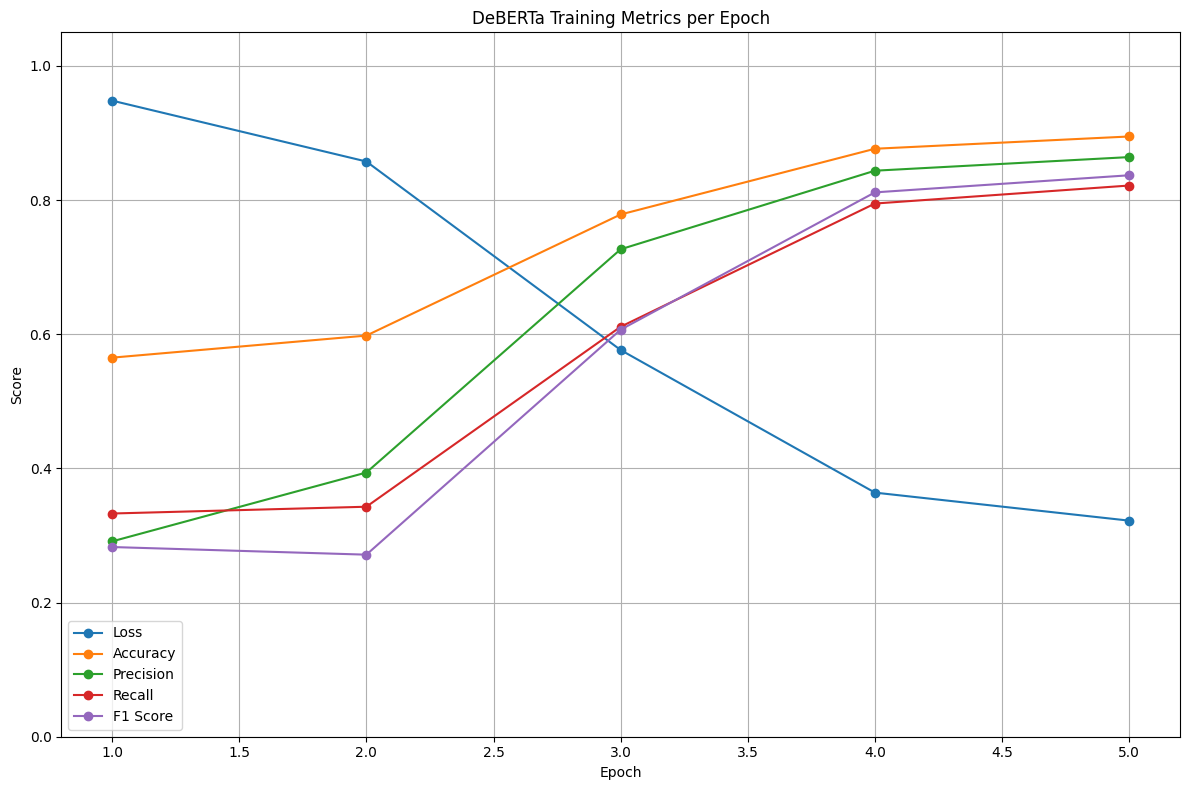

In [ ]:
# Visualisasi hasil training DeBERTa
plt.figure(figsize=(12, 8))
plt.plot(deberta_epoch_list, deberta_loss_list, label='Loss', marker='o')
plt.plot(deberta_epoch_list, deberta_accuracy_list, label='Accuracy', marker='o')
plt.plot(deberta_epoch_list, deberta_precision_list, label='Precision', marker='o')
plt.plot(deberta_epoch_list, deberta_recall_list, label='Recall', marker='o')
plt.plot(deberta_epoch_list, deberta_f1_list, label='F1 Score', marker='o')

plt.title('DeBERTa Training Metrics per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("deberta_training_metrics.png")  # Simpan sebagai file
plt.show()


Classification Report DeBERTa:
              precision    recall  f1-score   support

    negative       0.91      0.97      0.94       390
     neutral       0.78      0.83      0.81       168
    positive       0.98      0.93      0.96       810

    accuracy                           0.93      1368
   macro avg       0.89      0.91      0.90      1368
weighted avg       0.94      0.93      0.93      1368



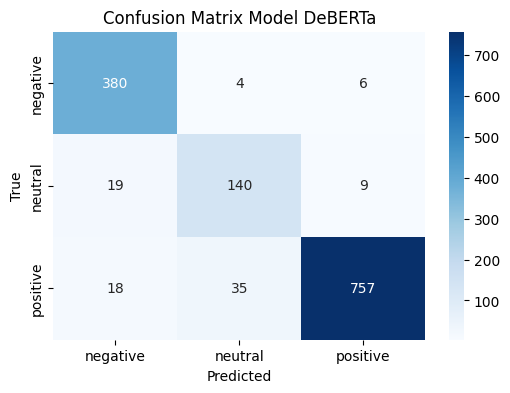

In [ ]:
# Evaluasi DeBERTa
import seaborn as sns
deberta_model.eval()

y_true_deberta, y_pred_deberta = [], []
with torch.no_grad():
    for batch in train_loader_deberta:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = deberta_model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=-1)

        y_true_deberta.extend(labels.cpu().numpy())
        y_pred_deberta.extend(predictions.cpu().numpy())

print("\nClassification Report DeBERTa:")
print(classification_report(y_true_deberta, y_pred_deberta, target_names=label_mapping.keys()))

# Visualisasikan hasilnya
cm = confusion_matrix(y_true_deberta, y_pred_deberta)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Model DeBERTa')
plt.show()

In [ ]:
deberta_accuracy = accuracy_score(y_true_deberta, y_pred_deberta)
deberta_precision, deberta_recall, deberta_f1, _ = precision_recall_fscore_support(y_true_deberta, y_pred_deberta, average='weighted')
print(f"DeBERTa Accuracy: {deberta_accuracy:.4f}")
print(f"DeBERTa Precision: {deberta_precision:.4f}")
print(f"DeBERTa Recall: {deberta_recall:.4f}")
print(f"DeBERTa F1-Score: {deberta_f1:.4f}")

DeBERTa Accuracy: 0.9335
DeBERTa Precision: 0.9364
DeBERTa Recall: 0.9335
DeBERTa F1-Score: 0.9342


# Visualisasi Perbandingan

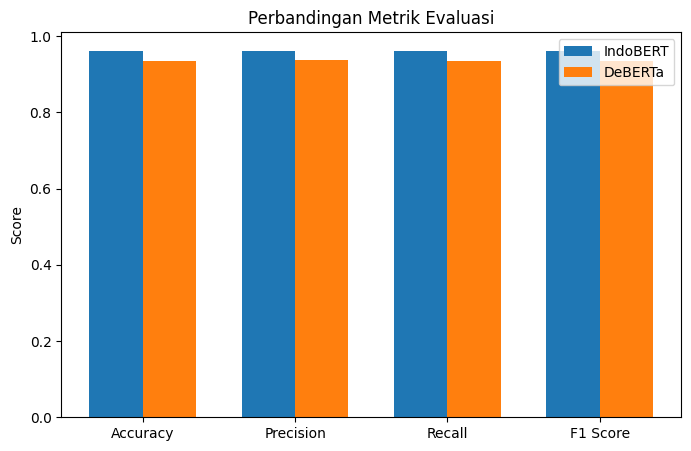

IndoBERT Metrics:
accuracy: 0.9619883040935673
precision: 0.9613418878336157
recall: 0.9619883040935673
f1_score: 0.9614255814339612

DeBERTa Metrics:
accuracy: 0.9334795321637427
precision: 0.936442974801914
recall: 0.9334795321637427
f1_score: 0.9342335652560648


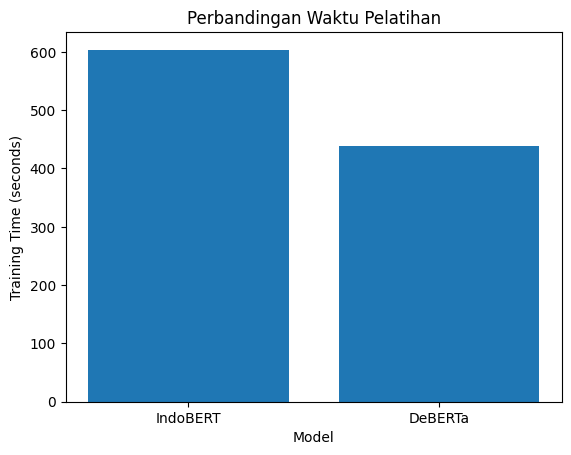

IndoBERT Training Time: 603.71 seconds
DeBERTa Training Time: 439.19 seconds


In [ ]:
# ===================== VISUALISASI PERBANDINGAN =====================

# Masukkan hasil akurasi, presisi, recall, dan f1-score secara otomatis

indobert_metrics = {
    "accuracy": indobert_accuracy,
    "precision": indobert_precision,
    "recall": indobert_recall,
    "f1_score": indobert_f1
}

deberta_metrics = {
    "accuracy": deberta_accuracy,
    "precision": deberta_precision,
    "recall": deberta_recall,
    "f1_score": deberta_f1
}


metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
indobert_values = [indobert_metrics["accuracy"], indobert_metrics["precision"], indobert_metrics["recall"], indobert_metrics["f1_score"]]
deberta_values = [deberta_metrics["accuracy"], deberta_metrics["precision"], deberta_metrics["recall"], deberta_metrics["f1_score"]]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bar1 = ax.bar(x - width/2, indobert_values, width, label='IndoBERT')
bar2 = ax.bar(x + width/2, deberta_values, width, label='DeBERTa')

ax.set_ylabel('Score')
ax.set_title('Perbandingan Metrik Evaluasi')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

print("IndoBERT Metrics:")
for metric, value in indobert_metrics.items():
    print(f"{metric}: {value}")

print("\nDeBERTa Metrics:")
for metric, value in deberta_metrics.items():
    print(f"{metric}: {value}")

# Perbandingan waktu training IndoBERT dan DeBERTa
indobert_training_time = indobert_training_time
deberta_training_time = deberta_training_time
x = ["IndoBERT", "DeBERTa"]
y = [indobert_training_time, deberta_training_time]
plt.bar(x, y)
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Perbandingan Waktu Pelatihan")
plt.show()

print(f"IndoBERT Training Time: {indobert_training_time:.2f} seconds")
print(f"DeBERTa Training Time: {deberta_training_time:.2f} seconds")